In [4]:
import pickle

save_dir = 'exp/DNNs/'

dir_specialists = ['git_baseline_show_epochs_2',
'git_specialist2_58',
'git_specialist2_59',
'git_specialist2_15',
'git_specialist2_28',
'git_specialist2_08',
'git_specialist2_69',
'git_specialist2_45',
'git_specialist2_38',
'git_specialist2_79',
'git_specialist2_39'] 



data_dict = {}

for i in range(len(dir_specialists)):
    filepath = save_dir + dir_specialists[i]
    with open(filepath + '/confmat.pk', 'rb') as f:
        data = pickle.load(f)
        conf_mat = data['conf_mat']
        conf_mat2 = conf_mat
        # print(conf_mat)
        conf_mat2 += conf_mat.T
        data_dict[dir_specialists[i]] = conf_mat2
        print(conf_mat2)




[[  0  26   0   0   0  47   0   0 428  28]
 [ 26   0   2   6   2 534   3   4   3   8]
 [  0   2   0   0   0   6   0   0 493  43]
 [  0   6   0   0  35  58   0   0 236 181]
 [  0   2   0  35  46 310  42  25  30 133]
 [ 47 534   6  58 310 610  38 113 655 580]
 [  0   3   0   0  42  38   0   0   8 403]
 [  0   4   0   0  25 113   0   0  97 256]
 [428   3 493 236  30 655   8  97  10  25]
 [ 28   8  43 181 133 580 403 256  25  48]]
[[718   1 171  22   0 120   0  10   0   3]
 [  1 854   1   0   1  10   4   0  54  69]
 [171   1 740  48   1  63   4  38   2   5]
 [ 22   0  48 626  15  20  14 269   2   1]
 [  0   1   1  15 874  27  19  76   1   3]
 [120  10  63  20  27 786   8  31 106  59]
 [  0   4   4  14  19   8 860  85   0   5]
 [ 10   0  38 269  76  31  85 400   0   1]
 [  0  54   2   2   1 106   0   0 804 169]
 [  3  69   5   1   3  59   5   1 169 692]]
[[740   0 163  23   0 116   1   8   0   7]
 [  0 832   0   0   3  14   0   0  51  68]
 [163   0 746  52   0  60   1  29   2   2]
 [ 23   0

In [21]:
dir_specialists = ['git_baseline_show_epochs_2',
'git_specialist2_58',
'git_specialist2_59',
'git_specialist2_15',
'git_specialist2_28',
'git_specialist2_08',
'git_specialist2_69',
'git_specialist2_45',
'git_specialist2_38',
'git_specialist2_79',
'git_specialist2_39'] 

target = [0,8]

for i in dir_specialists:
    key = str(i)
    mat = data_dict[key]
    value = mat[target[0]][target[1]]
    print(f"{key}: {value}")


git_baseline_show_epochs_2: 428
git_specialist2_58: 0
git_specialist2_59: 0
git_specialist2_15: 0
git_specialist2_28: 1
git_specialist2_08: 1
git_specialist2_69: 1
git_specialist2_45: 0
git_specialist2_38: 0
git_specialist2_79: 1
git_specialist2_39: 3


git_baseline_show_epochs_2: 655
git_specialist2_58: 106
git_specialist2_59: 101
git_specialist2_15: 110
git_specialist2_28: 101
git_specialist2_08: 100
git_specialist2_69: 102
git_specialist2_45: 107
git_specialist2_38: 112
git_specialist2_79: 102
git_specialist2_39: 99

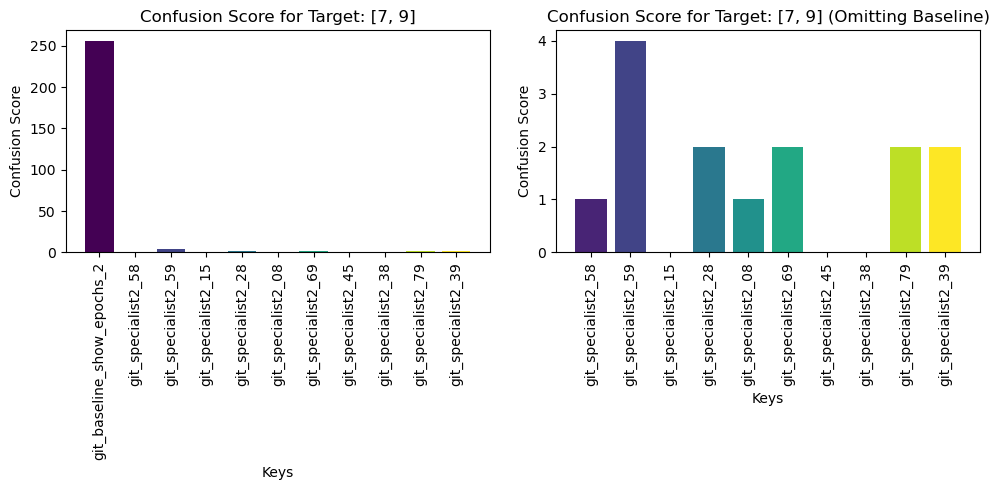

In [26]:
import matplotlib.pyplot as plt

dir_specialists = ['git_baseline_show_epochs_2',
'git_specialist2_58',
'git_specialist2_59',
'git_specialist2_15',
'git_specialist2_28',
'git_specialist2_08',
'git_specialist2_69',
'git_specialist2_45',
'git_specialist2_38',
'git_specialist2_79',
'git_specialist2_39'] 

target = [3,9]

# Generate consistent colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(dir_specialists)))

# Plot 1: with all elements
values = []
for i in dir_specialists:
    key = str(i)
    mat = data_dict[key]
    value = mat[target[0]][target[1]]
    values.append(value)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(dir_specialists, values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Keys')
plt.ylabel('Confusion Score')
plt.title(f"Confusion Score for Target: {target}")

# Plot 2: omitting the first element
values = []
for i in dir_specialists[1:]:
    key = str(i)
    mat = data_dict[key]
    value = mat[target[0]][target[1]]
    values.append(value)

plt.subplot(1, 2, 2)
plt.bar(dir_specialists[1:], values, color=colors[1:])
plt.xticks(rotation=90)
plt.xlabel('Keys')
plt.ylabel('Confusion Score')
plt.title(f"Confusion Score for Target: {target} (Omitting Baseline)")

plt.tight_layout()
plt.show()
